## CONVOLUTIONAL NEURAL NETWORK FRUITS

Architettura modello:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

n=10 #number of epochs
datatrain="data/Training"
datatest="data/Test"
img=(100,100)
batchsize=30


train_dataset = tf.keras.utils.image_dataset_from_directory(
    datatrain,
    label_mode='categorical',
    image_size=img,
    batch_size=batchsize
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    datatest,
    label_mode='categorical',
    image_size=img,
    batch_size=batchsize
)

model=tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(100, 100, 3)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),activation="relu",padding="same",input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation="relu",padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation="relu",padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=206, activation='softmax')
])

2025-08-07 13:27:33.496262: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-07 13:27:33.698251: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-07 13:27:36.063468: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-07 13:27:36.114588: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-07 13:27:41.126978: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

--- ISPEZIONE DI UN BATCH DI DATI DAL GENERATORE ---
Found 103993 files belonging to 206 classes.
Found 34711 files belonging to 206 classes.


Compilazione Modello:

In [2]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

Addestramento Modello:

In [3]:
history=model.fit(train_dataset,epochs=n,validation_data=test_dataset)

Epoch 1/10
3467/3467 [==============================] - 425s 122ms/step - loss: 0.7780 - accuracy: 0.7918 - val_loss: 0.2251 - val_accuracy: 0.9315
Epoch 2/10
3467/3467 [==============================] - 375s 108ms/step - loss: 0.1497 - accuracy: 0.9490 - val_loss: 0.2043 - val_accuracy: 0.9469
Epoch 3/10
3467/3467 [==============================] - 362s 104ms/step - loss: 0.1013 - accuracy: 0.9665 - val_loss: 0.1734 - val_accuracy: 0.9613
Epoch 4/10
3467/3467 [==============================] - 366s 105ms/step - loss: 0.0768 - accuracy: 0.9749 - val_loss: 0.1518 - val_accuracy: 0.9591
Epoch 5/10
3467/3467 [==============================] - 372s 107ms/step - loss: 0.0663 - accuracy: 0.9785 - val_loss: 0.1340 - val_accuracy: 0.9679
Epoch 6/10
3467/3467 [==============================] - 365s 105ms/step - loss: 0.0535 - accuracy: 0.9829 - val_loss: 0.1311 - val_accuracy: 0.9722
Epoch 7/10
3467/3467 [==============================] - 363s 105ms/step - loss: 0.0474 - accuracy: 0.9848 - val_

Grafici:

Ora creo i grafici di accuratezza e loss...


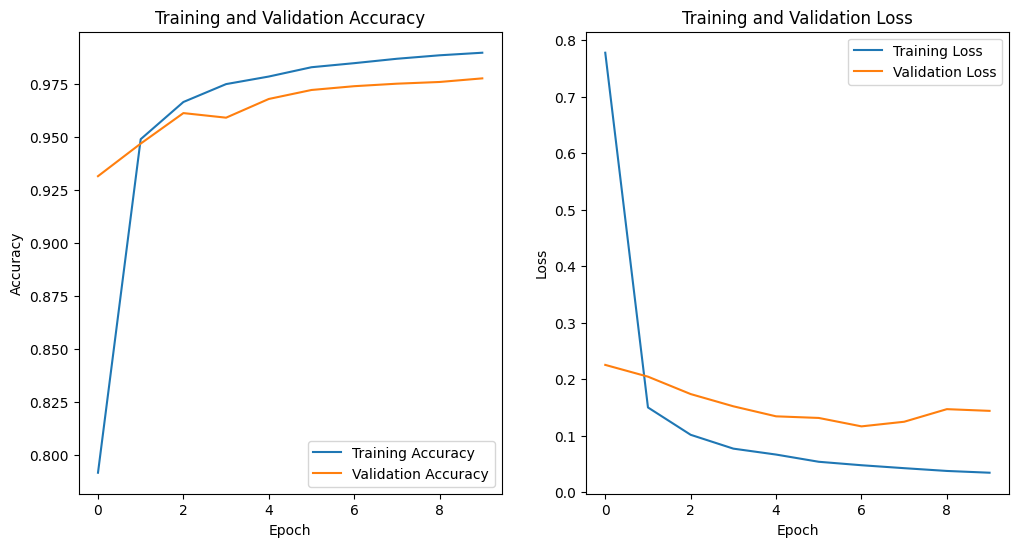

In [4]:
print("Ora creo i grafici di accuratezza e loss...")

# Estraggo i dati dalla cronologia
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Creo un array di numeri per l'asse X (le epoche)
epochs_range = range(n)

# Creo la figura che conterrà i due grafici
plt.figure(figsize=(12, 6)) # figsize imposta le dimensioni (larghezza, altezza)

# Primo grafico: Accuratezza
plt.subplot(1, 2, 1) # (1 riga, 2 colonne, grafico numero 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Secondo grafico: Loss
plt.subplot(1, 2, 2) # (1 riga, 2 colonne, grafico numero 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Mostro la figura con i due grafici
plt.show()


Test on random fruits:



--- TEST SU UNA NUOVA IMMAGINE ---
Nomi delle classi caricati correttamente. Esempio: ['Apple 10', 'Apple 11', 'Apple 12']

--- RISULTATO PREVISIONE ---
Immagine testata: lemon
Il modello predice: 'Lemon Meyer 1'
Confidenza: 94.47%


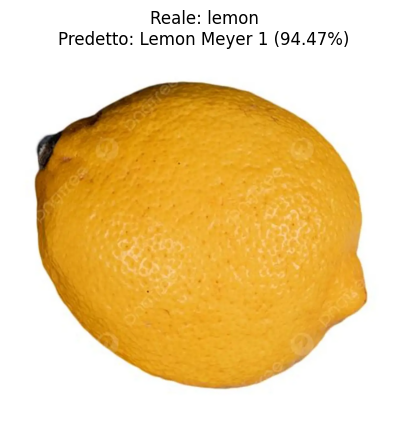

In [17]:
import os

# Definiamo la funzione per la previsione (questa non cambia)
def predict_image(model_to_test, image_path, class_names_list):
    img = tf.keras.utils.load_img(image_path, target_size=(100, 100))
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = tf.expand_dims(img_array, 0)
    
    predictions = model_to_test.predict(img_batch, verbose=0)
    
    score = predictions[0]
    predicted_index = np.argmax(score)
    predicted_class_name = class_names_list[predicted_index]
    confidence = 100 * np.max(score)
    
    return predicted_class_name, confidence

# --- ESECUZIONE DEL TEST ---

print("\n\n--- TEST SU UNA NUOVA IMMAGINE ---")

# 1. Recuperiamo la lista dei nomi delle classi.
#    Il tuo generatore si chiama 'test_dataset', quindi usiamo quello.
try:
    class_names = test_dataset.class_names
    print(f"Nomi delle classi caricati correttamente. Esempio: {class_names[:3]}")

    # 2. Scegliamo un'immagine di esempio dal tuo test set
    test_image_folder = "lemon"
    test_image_name = "lemon1.jpg"
    image_path_to_test = os.path.join("data", "Internet", test_image_folder, test_image_name)

    # 3. Visualizziamo l'immagine e facciamo la previsione
    #    Il tuo modello si chiama 'model', quindi passiamo quello alla funzione.
    predicted_class, confidence = predict_image(model, image_path_to_test, class_names)

    # Visualizziamo
    img_to_show = tf.keras.utils.load_img(image_path_to_test)
    plt.figure()
    plt.imshow(img_to_show)
    plt.axis('off')
    
    # 4. Stampiamo il risultato in modo chiaro
    print("\n--- RISULTATO PREVISIONE ---")
    print(f"Immagine testata: {test_image_folder}")
    print(f"Il modello predice: '{predicted_class}'")
    print(f"Confidenza: {confidence:.2f}%")
    
    # Aggiungiamo il risultato come titolo del grafico
    plt.title(f"Reale: {test_image_folder}\nPredetto: {predicted_class} ({confidence:.2f}%)")
    plt.show()

except NameError:
    print("\nERRORE: La variabile 'test_dataset' o 'model' non è definita.")
    print("Assicurati di aver eseguito le celle precedenti dove vengono creati il dataset e il modello.")
except FileNotFoundError:
    print(f"\nERRORE: Immagine non trovata al percorso: {image_path_to_test}")
    print("Controlla che il nome della cartella e dell'immagine siano corretti.")

# --- FINE CODICE ---



--- TEST SU 10 IMMAGINI CASUALI DAL TEST SET ---
Ho selezionato 10 immagini casuali. Ora eseguo le previsioni...


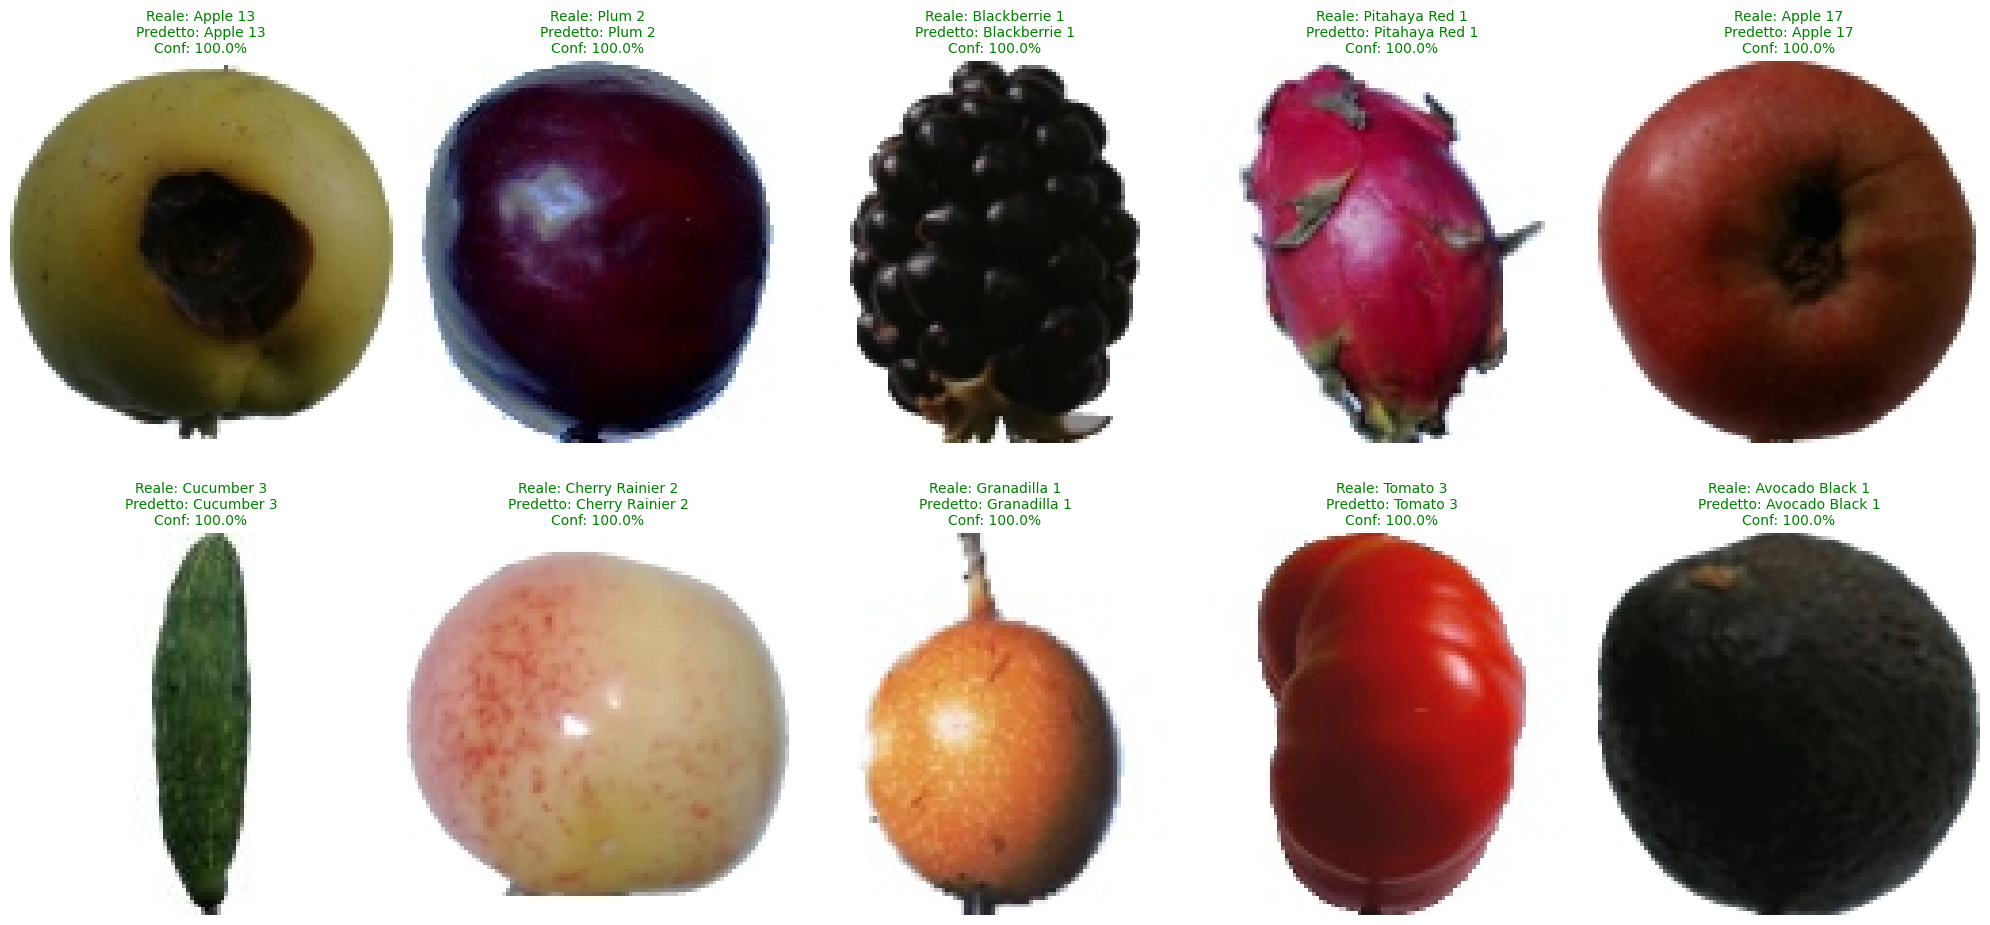

In [18]:
# --- INIZIO CODICE PER TEST MULTIPLO ---
import os
import random

print("\n\n--- TEST SU 10 IMMAGINI CASUALI DAL TEST SET ---")

# 1. Recuperiamo la lista di tutti i percorsi delle immagini nel test set
test_dir = "data/Test"
all_test_image_paths = []
# os.walk attraversa tutte le cartelle e sottocartelle
for folder, _, files in os.walk(test_dir):
    for filename in files:
        # Aggiungiamo il percorso completo alla nostra lista
        all_test_image_paths.append(os.path.join(folder, filename))

# 2. Selezioniamo 10 percorsi a caso dalla lista
# Usiamo min() per gestire il caso in cui ci siano meno di 10 immagini totali
num_images_to_test = min(10, len(all_test_image_paths))
if num_images_to_test > 0:
    random_image_paths = random.sample(all_test_image_paths, num_images_to_test)
    print(f"Ho selezionato {num_images_to_test} immagini casuali. Ora eseguo le previsioni...")

    # 3. Prepariamo la griglia per visualizzare i risultati
    plt.figure(figsize=(20, 10)) # Una figura più grande per contenere tutte le immagini

    # 4. Iteriamo su ogni immagine casuale, facciamo la previsione e la mostriamo
    for i, image_path in enumerate(random_image_paths):
        # Creiamo una sotto-griglia per ogni immagine (es. 2 righe, 5 colonne)
        plt.subplot(2, 5, i + 1)
        
        # Usiamo la nostra funzione di previsione
        # Assicurati che 'model' e 'class_names' esistano dalle celle precedenti
        predicted_class, confidence = predict_image(model, image_path, class_names)
        
        # Troviamo l'etichetta REALE dal nome della cartella
        true_class = os.path.basename(os.path.dirname(image_path))
        
        # Visualizziamo l'immagine
        img_to_show = tf.keras.utils.load_img(image_path)
        plt.imshow(img_to_show)
        plt.axis('off')
        
        # Creiamo un titolo colorato: verde se la previsione è corretta, rosso se è sbagliata
        title_color = "green" if predicted_class == true_class else "red"
        plt.title(f"Reale: {true_class}\nPredetto: {predicted_class}\nConf: {confidence:.1f}%", color=title_color, fontsize=10)

    plt.tight_layout() # Aggiusta automaticamente la spaziatura per evitare sovrapposizioni
    plt.show()

else:
    print("ERRORE: Non ho trovato nessuna immagine nella cartella di test.")

# --- FINE CODICE PER TEST MULTIPLO ---



--- TEST SU UNA IMMAGINE PER OGNUNA DELLE 206 CLASSI ---

--- RIEPILOGO DEL TEST ---
Totale classi testate: 206
Previsioni corrette: 202
Previsioni sbagliate: 4
Accuratezza del test 'uno per classe': 98.06%

--- VISUALIZZAZIONE DEGLI ERRORI DI PREVISIONE ---


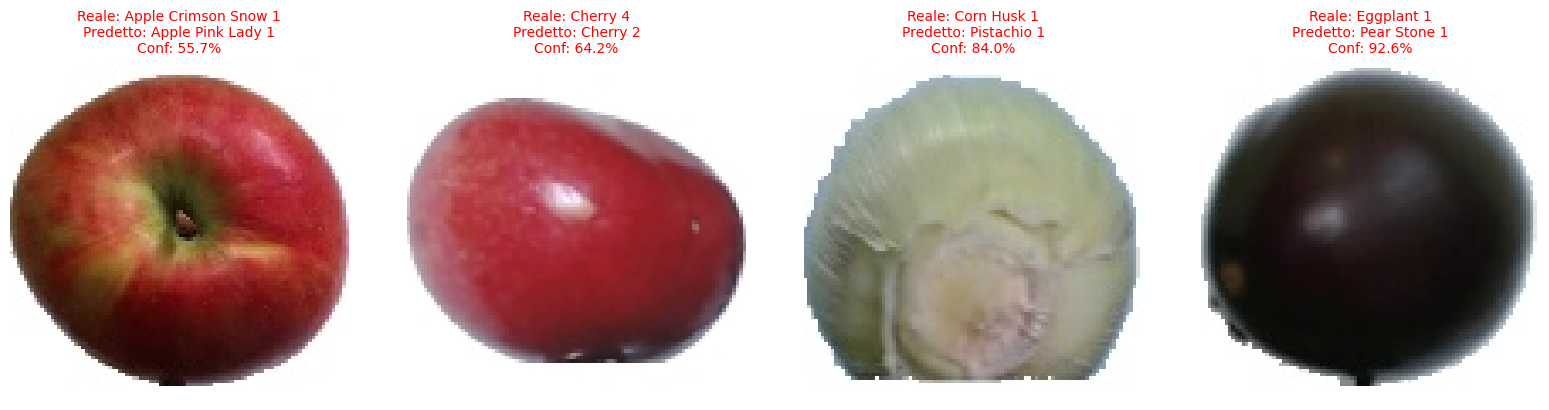

In [19]:
# --- INIZIO CODICE PER TESTARE UNA IMMAGINE PER CLASSE ---
import os
import random

print("\n\n--- TEST SU UNA IMMAGINE PER OGNUNA DELLE 206 CLASSI ---")

# 1. Recuperiamo la lista dei nomi delle classi e il percorso del test set
test_dir = "data/Test"
# Assicurati che 'class_names' esista dalla cella in cui hai creato 'test_dataset'
# class_names = test_dataset.class_names 

# 2. Inizializziamo delle liste per tenere traccia dei risultati
correct_predictions = 0
incorrect_predictions_info = [] # Salveremo qui le informazioni sugli errori

# 3. Iteriamo su ogni nome di classe
for class_name in class_names:
    # Costruiamo il percorso della cartella per questa classe
    class_folder_path = os.path.join(test_dir, class_name)
    
    # Prendiamo la lista di tutte le immagini in quella cartella
    try:
        images_in_folder = os.listdir(class_folder_path)
        if not images_in_folder:
            print(f"Attenzione: La cartella per la classe '{class_name}' è vuota. Salto.")
            continue
            
        # Scegliamo un'immagine a caso da quella cartella
        random_image_name = random.choice(images_in_folder)
        image_path_to_test = os.path.join(class_folder_path, random_image_name)
        
        # Eseguiamo la previsione
        predicted_class, confidence = predict_image(model, image_path_to_test, class_names)
        
        # Controlliamo se la previsione è corretta
        if predicted_class == class_name:
            correct_predictions += 1
        else:
            # Se è sbagliata, salviamo le informazioni per dopo
            incorrect_predictions_info.append({
                "path": image_path_to_test,
                "true_class": class_name,
                "predicted_class": predicted_class,
                "confidence": confidence
            })
            
    except FileNotFoundError:
        print(f"Attenzione: La cartella per la classe '{class_name}' non è stata trovata. Salto.")
        continue

# --- 4. Mostriamo il Riepilogo Numerico ---
print("\n--- RIEPILOGO DEL TEST ---")
total_classes = len(class_names)
accuracy_per_class_test = (correct_predictions / total_classes) * 100
print(f"Totale classi testate: {total_classes}")
print(f"Previsioni corrette: {correct_predictions}")
print(f"Previsioni sbagliate: {len(incorrect_predictions_info)}")
print(f"Accuratezza del test 'uno per classe': {accuracy_per_class_test:.2f}%")


# --- 5. Visualizziamo SOLO le Previsioni Sbagliate ---
if incorrect_predictions_info:
    print("\n--- VISUALIZZAZIONE DEGLI ERRORI DI PREVISIONE ---")
    num_errors = len(incorrect_predictions_info)
    # Calcoliamo dinamicamente le righe e colonne per la griglia
    cols = 5
    rows = (num_errors + cols - 1) // cols
    
    plt.figure(figsize=(20, 4 * rows))
    for i, error_info in enumerate(incorrect_predictions_info):
        plt.subplot(rows, cols, i + 1)
        
        img_to_show = tf.keras.utils.load_img(error_info["path"])
        plt.imshow(img_to_show)
        plt.axis('off')
        
        plt.title(f"Reale: {error_info['true_class']}\nPredetto: {error_info['predicted_class']}\nConf: {error_info['confidence']:.1f}%", color="red", fontsize=10)
        
    plt.tight_layout()
    plt.show()
else:
    print("\nINCREDIBILE! Nessun errore di previsione trovato in questo test casuale.")

# --- FINE CODICE ---